In [29]:
import numpy as np
import copy # for copying internal variables in lists
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import parameters_MF_MB as PRM
import simulations_MF_MB as SIM
import analyzes_MF_MB as ALY
import figures_indiv as GRAPH_i
import figures_pop as GRAPH_p
import figure_qvalue_map as GRAPH_Qmap
# import importlib
# importlib.reload(SIM)

# Reloading modules automatically :
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Recover data

Notations :
- 'Data_' : raw data, i.e. number of actions taken by each individual on each trial.
- 'LC_' : summary statistics across individuals for each trial.
- 'PRF_' : summary statistics across trials for each individual.
- 'CV_' : convergence data (time to convergence, performance at convergence...)
- 'NonCV_': number of non converging individuals for each replay type.
- 'D', 'S' : deterministic and stochastic cases
- '0' :, '1', or nothing : phase of the simulation corresponding to the data, with respects to the change of reward state at trial 25 (nothing: full simulation, 0: before change, 1: after change).

In general, all files exist for the full simulation, before, and after the change in reward location.  
Exception: Only two files (0,1) exist for convergence data, as it only makes sense to compute convergence on separate phases of the simulations, on which the reward state is kept constant.

## Deterministic

In [43]:
Dl_D = SIM.recover_data('Dl_D')
Dg0_D = SIM.recover_data('Dg0_D')
Dl0_D, Dl1_D, params0, params1 = ALY.split_before_after_change(Dl_D) # recompute to update parameters

Models_D = SIM.recover_data('Model_D', df=False)

LCl_D = SIM.recover_data('LCl_D')

PRFl0_5f_D = SIM.recover_data('PRFl0_5f_D')
PRFl0_5l_D = SIM.recover_data('PRFl0_5l_D')
PRFl1_5f_D = SIM.recover_data('PRFl1_5f_D')
PRFl1_5l_D = SIM.recover_data('PRFl1_5l_D')
PRFg0_D = SIM.recover_data('PRFg0_D')

CVl0_D = SIM.recover_data('CVl0_D')
CVl1_D = SIM.recover_data('CVl1_D')
NonCVl0_D = SIM.recover_data('NonCVl0_D', df=False)
NonCVl1_D = SIM.recover_data('NonCVl1_D', df=False)

## Stochastic

In [44]:
Dl_S = SIM.recover_data('Dl_S')
Dg0_S = SIM.recover_data('Dg0_S')
Dl0_S, Dl1_S, params0, params1 = ALY.split_before_after_change(Dl_S)

Models_S = SIM.recover_data('Model_S', df=False)

LCl_S = SIM.recover_data('LCl_S')

PRFl0_5f_S = SIM.recover_data('PRFl0_5f_S')
PRFl0_5l_S = SIM.recover_data('PRFl0_5l_S')
PRFl1_5f_S = SIM.recover_data('PRFl1_5f_S')
PRFl1_5l_S = SIM.recover_data('PRFl1_5l_S')
PRFg0_S = SIM.recover_data('PRFg0_S')

CVl0_S = SIM.recover_data('CVl0_S')
CVl1_S = SIM.recover_data('CVl1_S')
NonCVl0_S = SIM.recover_data('NonCVl0_S', df=False)
NonCVl1_S = SIM.recover_data('NonCVl1_S', df=False)

## Data structure

In [45]:
print(PRM.params)

{'n_individuals': 100, 'n_trials': 50, 'n_individuals_sims': {'learning': 100, 'generalization': 100, 'fast_test': 10}, 'n_trials_sims': {'learning': 50, 'generalization': 6, 'fast_test': 10}, 'alpha': 0.8, 'beta': 15.0, 'gamma': 0.9, 'alpha_vals': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]), 'beta_vals': {'learning': 15.0, 'generalization': 10.0, 'fast_test': 15.0}, 's_start': 35, 's_rw': 22, 'starting_points': {'learning': 35, 'generalization': [21, 34, 4], 'fast_test': 35}, 'reward_states': [22, 4], 'trial_change': 25, 'RSS': 90, 'RR': 20, 'n_seq_d': 6, 'RSS_d': 15, 'epsilon_d': 0.5, 'epsilon_p': 0.001, 'perc': 0.7, 'window': 5, 'n_types_replays': 5, 'replay_types': {0: 'No replay', 1: 'Backward replay', 2: 'Random replay', 3: 'Most diverse replay', 4: 'Prioritized sweeping', -1: 'Optimal policy'}, 'replay_refs': [0, 1, 2, 3, 4], 'nA': 8, 'nS': 36, 'state_coords': [(0.00320002, 0.0059351), (0.310727, 0.0241474), (0.593997, 0.152759), (0.724483, -0.118826), (0.9562

In [46]:
Dl0_D

,Unnamed: 0,Replay type,Individual,Trial,Performance
0,0,0,0,0,83
1,1,0,0,1,51
2,2,0,0,2,62
3,3,0,0,3,93
4,4,0,0,4,37
...,...,...,...,...,...
24970,24970,4,99,20,12
24971,24971,4,99,21,9
24972,24972,4,99,22,7
24973,24973,4,99,23,10


In [47]:
LCl_D

,Unnamed: 0,Replay type,Trial,Mean,STD,Q1,Q2,Q3
0,0,0,0,111.43,86.463548,45.00,83.0,153.50
1,1,0,1,81.92,68.582896,34.75,52.5,109.75
2,2,0,2,73.34,65.092276,30.00,56.0,89.75
3,3,0,3,67.73,58.302977,24.75,49.5,97.00
4,4,0,4,48.99,44.187441,22.75,35.5,59.75
...,...,...,...,...,...,...,...,...
245,245,4,45,10.19,6.512595,6.00,8.0,11.00
246,246,4,46,10.14,8.392878,6.00,7.0,11.00
247,247,4,47,9.48,5.754094,6.00,7.0,11.00
248,248,4,48,9.68,6.502123,6.00,7.5,11.00


In [48]:
PRFl0_5f_D

,Unnamed: 0,Replay type,Individual,Mean,STD
0,0,0,0,65.2,20.478281
1,1,0,1,70.0,31.112698
2,2,0,2,131.8,141.036733
3,3,0,3,33.0,15.165751
4,4,0,4,101.4,91.569864
...,...,...,...,...,...
495,495,4,95,37.2,36.223749
496,496,4,96,31.8,34.330162
497,497,4,97,31.4,44.319747
498,498,4,98,54.8,87.151363


In [49]:
CVl0_D

,Unnamed: 0,Replay type,Individual,Convergence trial,Performance at Convergence,Time to Convergence
0,0,0,0,6,16,365
1,1,0,1,5,25,375
2,2,0,2,5,36,695
3,3,0,3,5,44,209
4,4,0,4,5,19,526
...,...,...,...,...,...,...
495,495,4,95,1,25,134
496,496,4,96,1,22,122
497,497,4,97,1,9,129
498,498,4,98,3,14,259


In [50]:
ALY.display_convergence(NonCVl0_D, NonCVl1_D, NonCVl0_S, NonCVl1_S)

Deterministic environment
Number of non-converging trials per type of replay:
Phase 0 {0: 0, 1: 0, 2: 0, 3: 0, 4: 0}
Phase 1 {0: 0, 1: 0, 2: 0, 3: 0, 4: 0}
---------------------------
Stochastic environment
Number of non-converging trials per type of replay:
Phase 0 {0: 0, 1: 0, 2: 0, 3: 0, 4: 0}
Phase 1 {0: 0, 1: 0, 2: 0, 3: 0, 4: 0}
---------------------------


# Learning curves

QUESTION : For the MB agent, is the performance due mainly to model-based learning, orrather to the type of replay ?  
It might be possible to compare only MB agents performing different types of replays, as 'backward', 'random' and 'most diverse' replays are not dependent on the learning algorithm (MF or MB).  
Moreover, it might be possible to extend 'prioritized sweeping' to MF agents, by considering as predecessors the states leading to the transition in the recent history.

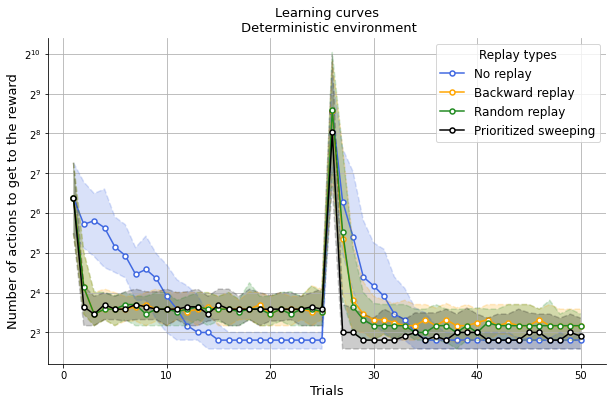

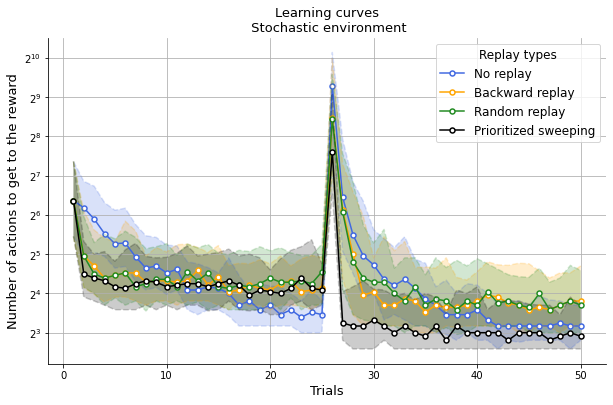

In [20]:
LCl_D = SIM.recover_data('LCl_D')
LCl_S = SIM.recover_data('LCl_S')
params = copy.deepcopy(PRM.params)
params['replay_refs'] = [0,1,2,4]

mode = 'median'
log_scale = True
GRAPH_p.plot_learning_curves(LCl_D, mode=mode, log_scale=log_scale, deterministic=True, save=False, params=params)
GRAPH_p.plot_learning_curves(LCl_S, mode=mode, log_scale=log_scale, deterministic=False, save=False, params=params)

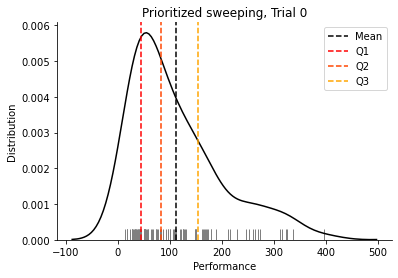

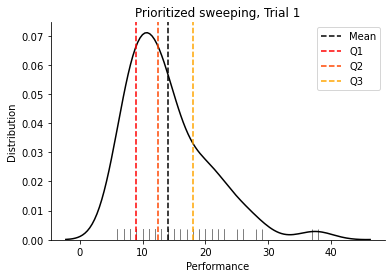

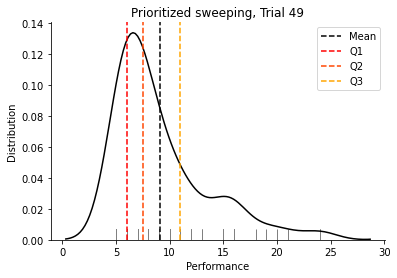

In [6]:
Dl_D = SIM.recover_data('Dl_D')
rep = 4
for t in [0,1,49]:
    GRAPH_p.plot_distribution_perf_trial(rep, t, Dl_D, LCl_D, params=params)

# Performance across the population

## Deterministic environment

/home/esther/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


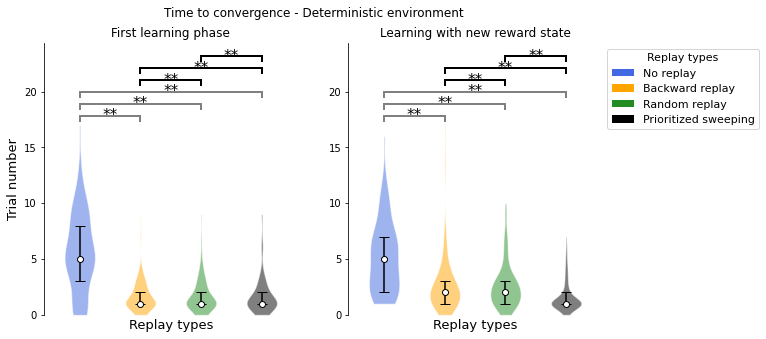

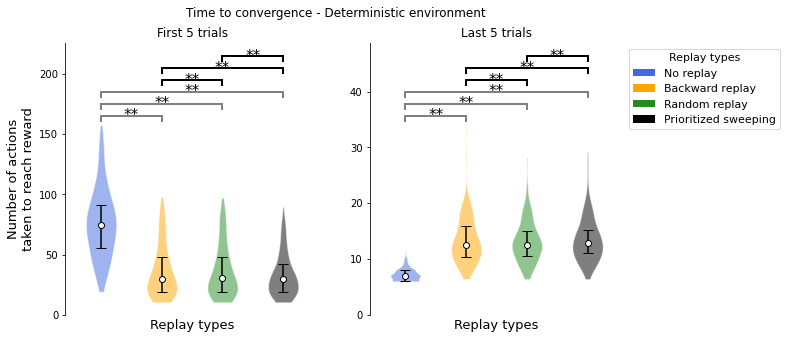

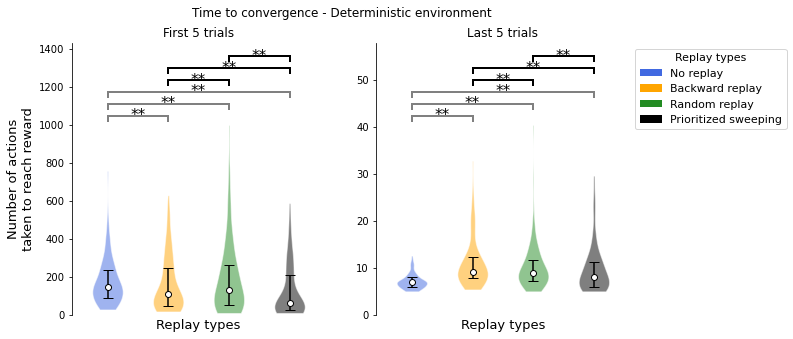

In [53]:
params = copy.deepcopy(PRM.params)
params['replay_refs'] = [0,1,2,4]
CVl0_D = SIM.recover_data('CVl0_D')
CVl1_D = SIM.recover_data('CVl1_D')
NonCVl0_D = SIM.recover_data('NonCVl0_D', df=False)
NonCVl1_D = SIM.recover_data('NonCVl1_D', df=False)
PRFl0_5f_D = SIM.recover_data('PRFl0_5f_D')
PRFl0_5l_D = SIM.recover_data('PRFl0_5l_D')
PRFl1_5f_D = SIM.recover_data('PRFl1_5f_D')
PRFl1_5l_D = SIM.recover_data('PRFl1_5l_D')

GRAPH_p.plot_comparison(CVl0_D, CVl1_D, variable='conv', params=params)
GRAPH_p.plot_comparison(PRFl0_5f_D, PRFl0_5l_D, variable='perf', params=params)
GRAPH_p.plot_comparison(PRFl1_5f_D, PRFl1_5l_D, variable='perf', params=params)

In [54]:
test = 'kruskal'
print('>>> Time to convergence L0 <<<')
Hvalue, pvalue = ALY.test_groups(CVl0_D, 'Time to Convergence', params=params)
significant = ALY.test_pairwise(CVl0_D, 'Time to Convergence', params=params, test=test)
print('-------------------------------')
print('>>> Time to convergence L1 <<<')
Hvalue, pvalue = ALY.test_groups(CVl1_D, 'Time to Convergence', params=params)
significant = ALY.test_pairwise(CVl1_D, 'Time to Convergence', params=params, test=test)

>>> Time to convergence L0 <<<
Kruskal-Wallis result : H = 117.99184277641787, p-value = 2.0888053327134232e-25 < 0.001
   G0  G1   Uvalue  pvalue
0   0   1  15479.6     0.0
1   0   2    15235     0.0
2   0   4  14849.9     0.0
3   1   2    16021     0.0
4   1   4  15751.4     0.0
5   2   4  16457.3     0.0
Significant pairs : [(0, 1, 0.0), (0, 2, 0.0), (0, 4, 0.0), (1, 2, 0.0), (1, 4, 0.0), (2, 4, 0.0)]
-------------------------------
>>> Time to convergence L1 <<<
Kruskal-Wallis result : H = 25.822381014212016, p-value = 1.0389978995239571e-05 < 0.001
   G0  G1   Uvalue  pvalue
0   0   1  15369.6     0.0
1   0   2  15254.8     0.0
2   0   4  15389.7     0.0
3   1   2    16392     0.0
4   1   4    16912     0.0
5   2   4    17895     0.0
Significant pairs : [(0, 1, 0.0), (0, 2, 0.0), (0, 4, 0.0), (1, 2, 0.0), (1, 4, 0.0), (2, 4, 0.0)]


In [55]:
print('>>> Performance L0 5 first <<<')
Hvalue, pvalue = ALY.test_groups(PRFl0_5f_D, 'Mean', params=params)
significant = ALY.test_pairwise(PRFl0_5f_D, 'Mean', params=params)
print('-------------------------------')
print('>>> Performance L0 5 last <<<')
Hvalue, pvalue = ALY.test_groups(PRFl0_5l_D, 'Mean', params=params)
significant = ALY.test_pairwise(PRFl0_5l_D, 'Mean', params=params)

>>> Performance L0 5 first <<<
Kruskal-Wallis result : H = 130.06207725755002, p-value = 5.244397776470168e-28 < 0.001
   G0  G1   Uvalue  pvalue
0   0   1   -21160     0.0
1   0   2 -20809.5     0.0
2   0   4   -20563     0.0
3   1   2   -25636     0.0
4   1   4 -25440.5     0.0
5   2   4 -25672.5     0.0
Significant pairs : [(0, 1, 0.0), (0, 2, 0.0), (0, 4, 0.0), (1, 2, 0.0), (1, 4, 0.0), (2, 4, 0.0)]
-------------------------------
>>> Performance L0 5 last <<<
Kruskal-Wallis result : H = 198.09203425577803, p-value = 1.0899608455255605e-42 < 0.001
   G0  G1   Uvalue  pvalue
0   0   1 -17697.5     0.0
1   0   2 -17611.5     0.0
2   0   4   -16995     0.0
3   1   2   -27457     0.0
4   1   4 -26630.5     0.0
5   2   4 -27298.5     0.0
Significant pairs : [(0, 1, 0.0), (0, 2, 0.0), (0, 4, 0.0), (1, 2, 0.0), (1, 4, 0.0), (2, 4, 0.0)]


In [56]:
print('>>> Performance L1 5 first <<<')
Hvalue, pvalue = ALY.test_groups(PRFl1_5f_D, 'Mean', params=params)
significant = ALY.test_pairwise(PRFl1_5f_D, 'Mean', params=params)
print('-------------------------------')
print('>>> Performance L1 5 last <<<')
Hvalue, pvalue = ALY.test_groups(PRFl1_5l_D, 'Mean', params=params)
significant = ALY.test_pairwise(PRFl1_5l_D, 'Mean', params=params)

>>> Performance L1 5 first <<<
Kruskal-Wallis result : H = 22.35971477814862, p-value = 5.490150679180134e-05 < 0.001
   G0  G1   Uvalue  pvalue
0   0   1 -25282.5     0.0
1   0   2 -23284.5     0.0
2   0   4   -23179     0.0
3   1   2   -24424     0.0
4   1   4   -25479     0.0
5   2   4   -25835     0.0
Significant pairs : [(0, 1, 0.0), (0, 2, 0.0), (0, 4, 0.0), (1, 2, 0.0), (1, 4, 0.0), (2, 4, 0.0)]
-------------------------------
>>> Performance L1 5 last <<<
Kruskal-Wallis result : H = 65.11172908053906, p-value = 4.747446339363547e-14 < 0.001
   G0  G1   Uvalue  pvalue
0   0   1 -19084.5     0.0
1   0   2   -19234     0.0
2   0   4   -19878     0.0
3   1   2 -27062.5     0.0
4   1   4 -27305.5     0.0
5   2   4 -27818.5     0.0
Significant pairs : [(0, 1, 0.0), (0, 2, 0.0), (0, 4, 0.0), (1, 2, 0.0), (1, 4, 0.0), (2, 4, 0.0)]


## Stochastic environment

Deterministic environment
Number of non-converging trials per type of replay:
Phase 0 {0: 0, 1: 0, 2: 0, 3: 0, 4: 0}
Phase 1 {0: 0, 1: 0, 2: 0, 3: 0, 4: 0}
---------------------------
Stochastic environment
Number of non-converging trials per type of replay:
Phase 0 {0: 0, 1: 0, 2: 0, 3: 0, 4: 0}
Phase 1 {0: 0, 1: 0, 2: 0, 3: 0, 4: 0}
---------------------------


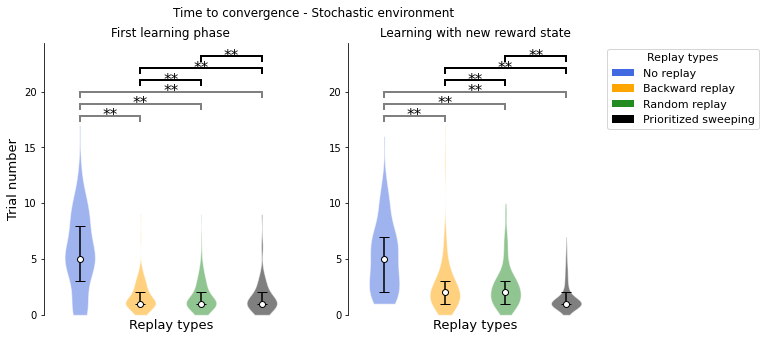

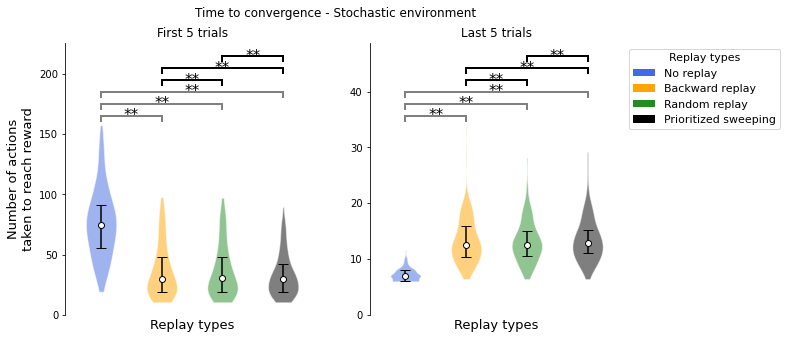

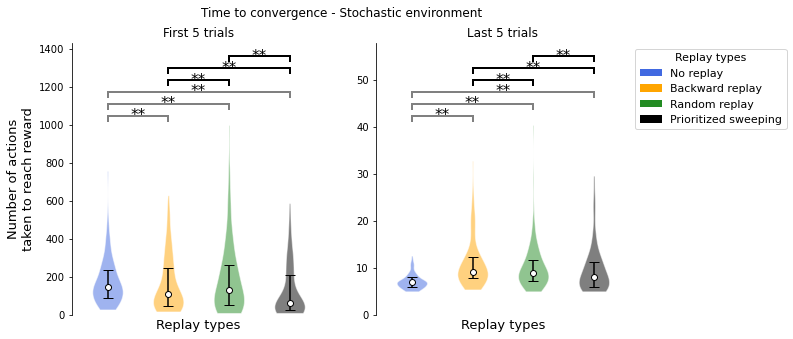

In [57]:
params = copy.deepcopy(PRM.params)
params['replay_refs'] = [0,1,2,4]
CVl0_S = SIM.recover_data('CVl0_S')
CVl1_S = SIM.recover_data('CVl1_S')
NonCVl0_S = SIM.recover_data('NonCVl0_S', df=False)
NonCVl1_S = SIM.recover_data('NonCVl1_S', df=False)
PRFl0_5f_S = SIM.recover_data('PRFl0_5f_S')
PRFl0_5l_S = SIM.recover_data('PRFl0_5l_S')
PRFl1_5f_S = SIM.recover_data('PRFl1_5f_S')
PRFl1_5l_S = SIM.recover_data('PRFl1_5l_S')

ALY.display_convergence(NonCVl0_D, NonCVl1_D, NonCVl0_S, NonCVl1_S)
GRAPH_p.plot_comparison(CVl0_S, CVl1_S, variable='conv', params=params, deterministic=False)
GRAPH_p.plot_comparison(PRFl0_5f_S, PRFl0_5l_S, variable='perf', params=params, deterministic=False)
GRAPH_p.plot_comparison(PRFl1_5f_S, PRFl1_5l_S, variable='perf', params=params, deterministic=False)

In [58]:
test = 'kruskal'
print('>>> Time to convergence L0 <<<')
Hvalue, pvalue = ALY.test_groups(CVl0_S, 'Time to Convergence', params=params)
significant = ALY.test_pairwise(CVl0_S, 'Time to Convergence', params=params, test=test)
print('-------------------------------')
print('>>> Time to convergence L1 <<<')
Hvalue, pvalue = ALY.test_groups(CVl1_S, 'Time to Convergence', params=params)
significant = ALY.test_pairwise(CVl1_S, 'Time to Convergence', params=params, test=test)

>>> Time to convergence L0 <<<
Kruskal-Wallis result : H = 117.99184277641787, p-value = 2.0888053327134232e-25 < 0.001
   G0  G1   Uvalue  pvalue
0   0   1  15479.6     0.0
1   0   2    15235     0.0
2   0   4  14849.9     0.0
3   1   2    16021     0.0
4   1   4  15751.4     0.0
5   2   4  16457.3     0.0
Significant pairs : [(0, 1, 0.0), (0, 2, 0.0), (0, 4, 0.0), (1, 2, 0.0), (1, 4, 0.0), (2, 4, 0.0)]
-------------------------------
>>> Time to convergence L1 <<<
Kruskal-Wallis result : H = 25.822381014212016, p-value = 1.0389978995239571e-05 < 0.001
   G0  G1   Uvalue  pvalue
0   0   1  15369.6     0.0
1   0   2  15254.8     0.0
2   0   4  15389.7     0.0
3   1   2    16392     0.0
4   1   4    16912     0.0
5   2   4    17895     0.0
Significant pairs : [(0, 1, 0.0), (0, 2, 0.0), (0, 4, 0.0), (1, 2, 0.0), (1, 4, 0.0), (2, 4, 0.0)]


In [59]:
print('>>> Performance L0 5 first <<<')
Hvalue, pvalue = ALY.test_groups(PRFl0_5f_S, 'Mean', params=params)
significant = ALY.test_pairwise(PRFl0_5f_S, 'Mean', params=params)
print('-------------------------------')
print('>>> Performance L0 5 last <<<')
Hvalue, pvalue = ALY.test_groups(PRFl0_5l_S, 'Mean', params=params)
significant = ALY.test_pairwise(PRFl0_5l_S, 'Mean', params=params)

>>> Performance L0 5 first <<<
Kruskal-Wallis result : H = 130.06207725755002, p-value = 5.244397776470168e-28 < 0.001
   G0  G1   Uvalue  pvalue
0   0   1   -21160     0.0
1   0   2 -20809.5     0.0
2   0   4   -20563     0.0
3   1   2   -25636     0.0
4   1   4 -25440.5     0.0
5   2   4 -25672.5     0.0
Significant pairs : [(0, 1, 0.0), (0, 2, 0.0), (0, 4, 0.0), (1, 2, 0.0), (1, 4, 0.0), (2, 4, 0.0)]
-------------------------------
>>> Performance L0 5 last <<<
Kruskal-Wallis result : H = 198.09203425577803, p-value = 1.0899608455255605e-42 < 0.001
   G0  G1   Uvalue  pvalue
0   0   1 -17697.5     0.0
1   0   2 -17611.5     0.0
2   0   4   -16995     0.0
3   1   2   -27457     0.0
4   1   4 -26630.5     0.0
5   2   4 -27298.5     0.0
Significant pairs : [(0, 1, 0.0), (0, 2, 0.0), (0, 4, 0.0), (1, 2, 0.0), (1, 4, 0.0), (2, 4, 0.0)]


In [60]:
print('>>> Performance L1 5 first <<<')
Hvalue, pvalue = ALY.test_groups(PRFl1_5f_S, 'Mean', params=params)
significant = ALY.test_pairwise(PRFl1_5f_S, 'Mean', params=params)
print('-------------------------------')
print('>>> Performance L1 5 last <<<')
Hvalue, pvalue = ALY.test_groups(PRFl1_5l_S, 'Mean', params=params)
significant = ALY.test_pairwise(PRFl1_5l_S, 'Mean', params=params)

>>> Performance L1 5 first <<<
Kruskal-Wallis result : H = 22.35971477814862, p-value = 5.490150679180134e-05 < 0.001
   G0  G1   Uvalue  pvalue
0   0   1 -25282.5     0.0
1   0   2 -23284.5     0.0
2   0   4   -23179     0.0
3   1   2   -24424     0.0
4   1   4   -25479     0.0
5   2   4   -25835     0.0
Significant pairs : [(0, 1, 0.0), (0, 2, 0.0), (0, 4, 0.0), (1, 2, 0.0), (1, 4, 0.0), (2, 4, 0.0)]
-------------------------------
>>> Performance L1 5 last <<<
Kruskal-Wallis result : H = 65.11172908053906, p-value = 4.747446339363547e-14 < 0.001
   G0  G1   Uvalue  pvalue
0   0   1 -19084.5     0.0
1   0   2   -19234     0.0
2   0   4   -19878     0.0
3   1   2 -27062.5     0.0
4   1   4 -27305.5     0.0
5   2   4 -27818.5     0.0
Significant pairs : [(0, 1, 0.0), (0, 2, 0.0), (0, 4, 0.0), (1, 2, 0.0), (1, 4, 0.0), (2, 4, 0.0)]


## Correlations

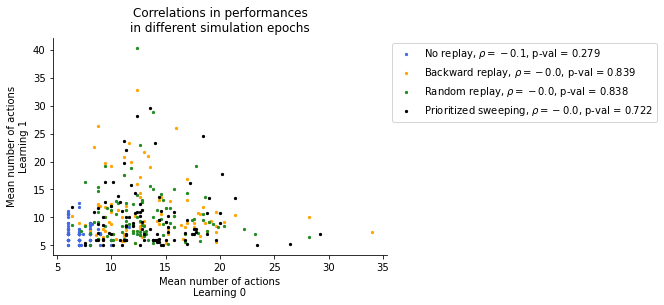

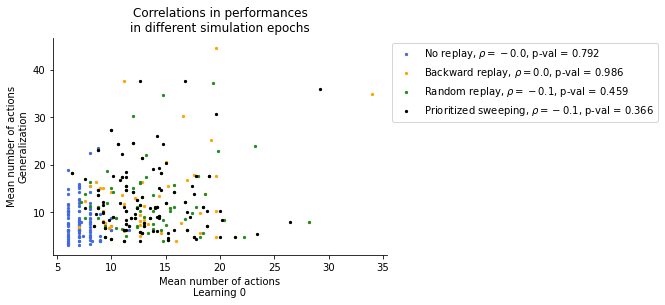

In [61]:
PRFl0_5l_D = SIM.recover_data('PRFl0_5l_D')
PRFl1_5l_D = SIM.recover_data('PRFl1_5l_D')
PRFg0_D = SIM.recover_data('PRFg0_D')

GRAPH_p.plot_correlations(PRFl0_5l_D, PRFl1_5l_D, label0='Mean number of actions\nLearning 0', label1='Mean number of actions\nLearning 1', params=params)
GRAPH_p.plot_correlations(PRFl0_5l_D, PRFg0_D, label0='Mean number of actions\nLearning 0', label1='Mean number of actions\nGeneralization', params=params)

# Q-value distributions

## Deterministic environment

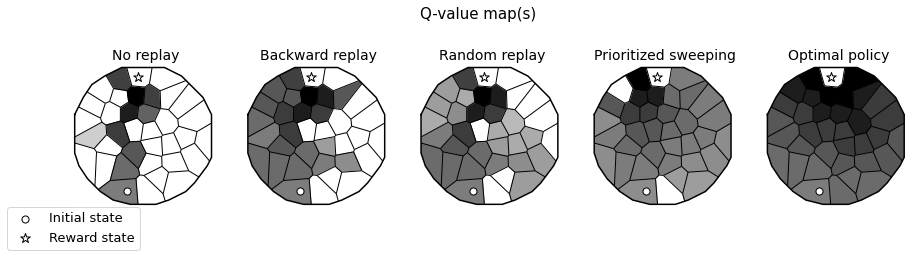

In [11]:
Models_D = SIM.recover_data('Model_D', df=False)
params = copy.deepcopy(PRM.params)
params['replay_refs'] = [0,1,2,4]

i = 4
Q_dict = dict(zip(params['replay_refs'], [None for rep in params['replay_refs']]))
for rep in params['replay_refs']:
    Q = Models_D['Q'][rep][i]
    Q_dict[rep] = Q.copy()

Qopt_D = SIM.recover_data('Qopt_D', df=False)
params['replay_refs'].append(-1)
Q_dict[-1] = Qopt_D

GRAPH_Qmap.plot_Qvalues_map(Q_dict, deterministic=True, params=params)

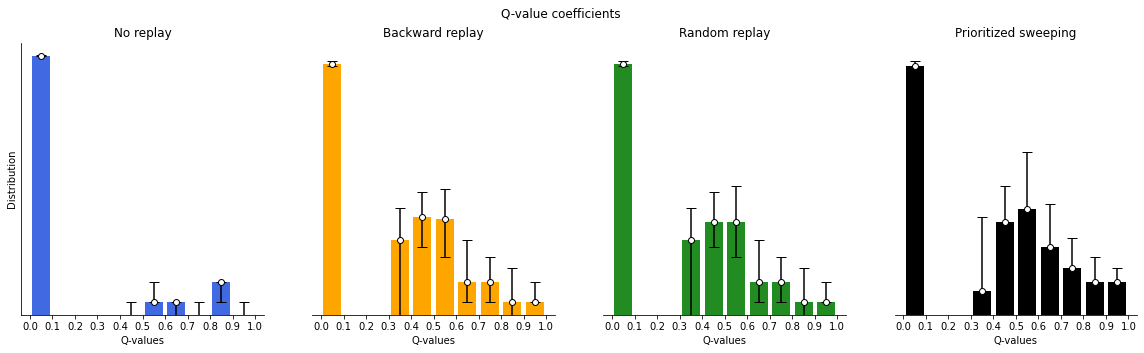

In [12]:
params = copy.deepcopy(PRM.params)
params['replay_refs'] = [0,1,2,4]
H_D = SIM.recover_data('Hpop_D', df=False)
GRAPH_p.plot_Q_distributions(H_D, params=params, log=True)

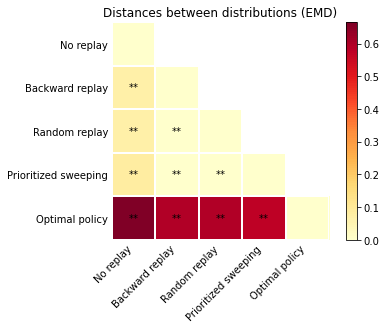

In [13]:
params = copy.deepcopy(PRM.params)
params['replay_refs'] = [0,1,2,4]

EMD_D = SIM.recover_data('EMDpop_D', df=False)
Stat_emd_D = SIM.recover_data('StatEMD_D', df=False)

GRAPH_p.compare_distributions(EMD_D, Stat_emd_D, params=params)

## Stochastic environment

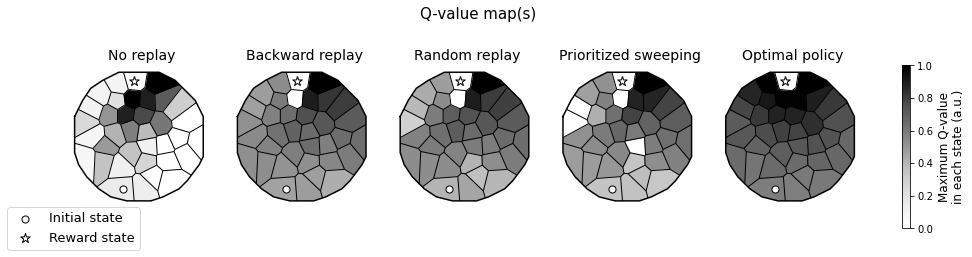

In [34]:
Models_S = SIM.recover_data('Model_S', df=False)
params = copy.deepcopy(PRM.params)
params['replay_refs'] = [0,1,2,4]

i = 0
Q_dict = dict(zip(params['replay_refs'], [None for rep in params['replay_refs']]))
for rep in params['replay_refs']:
    Q = Models_S['Q'][rep][i]
    Q_dict[rep] = Q.copy()

Qopt_S = SIM.recover_data('Qopt_S', df=False)
params['replay_refs'].append(-1)
Q_dict[-1] = Qopt_S

GRAPH_Qmap.plot_Qvalues_map(Q_dict, deterministic=True, params=params)

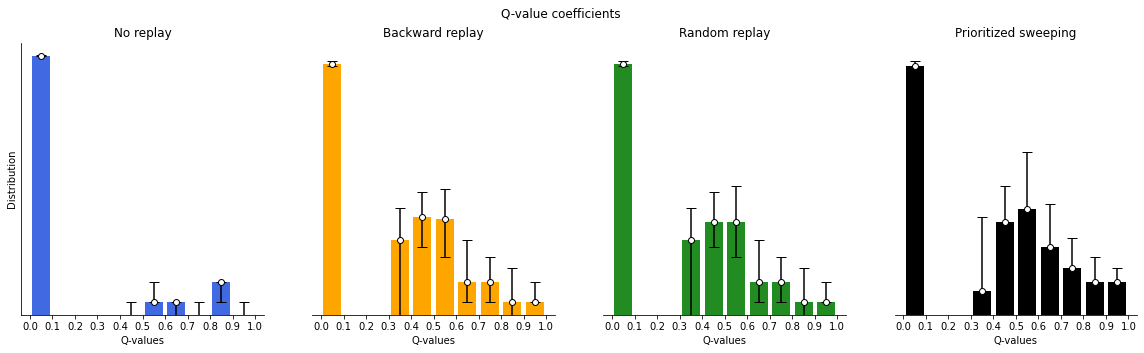

In [17]:
params = copy.deepcopy(PRM.params)
params['replay_refs'] = [0,1,2,4]
H_D = SIM.recover_data('Hpop_D', df=False)
GRAPH_p.plot_Q_distributions(H_D, params=params, log=True)

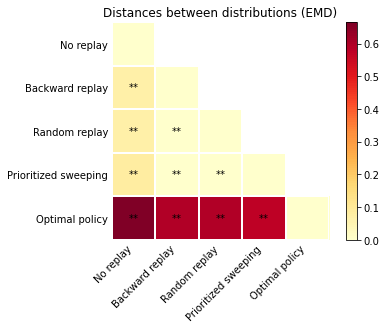

In [71]:
params = copy.deepcopy(PRM.params)
params['replay_refs'] = [0,1,2,4]

EMD_D = SIM.recover_data('EMDpop_D', df=False)
Stat_emd_D = SIM.recover_data('StatEMD_D', df=False)

GRAPH_p.compare_distributions(EMD_D, Stat_emd_D, params=params)

# Individuals - Trajectories and Replays

It might be useful to test other rewarded locations, as the only one tested tends to be on the same side as the one most explored by the agents.  
In the most diverse sequence, it might be advantageous to also incorporate several trajectories from the first trial, instea of only the last steps of the desired length.

In [36]:
params = copy.deepcopy(PRM.params)
params['replay_refs'] = [0,1,2,4]

Dl_indiv_D = SIM.recover_data('Dl_indiv_D', df=False)
Dl_indiv_S = SIM.recover_data('Dl_indiv_S', df=False)

LCl0_indiv_D = SIM.recover_data('LCl0_indiv_D')
LCl1_indiv_D = SIM.recover_data('LCl1_indiv_D')
LCl0_indiv_S = SIM.recover_data('LCl0_indiv_S')
LCl1_indiv_S = SIM.recover_data('LCl1_indiv_S')

LCl0_D = SIM.recover_data('LCl0_D')
LCl1_D = SIM.recover_data('LCl1_D')
LCl0_S = SIM.recover_data('LCl0_S')
LCl1_S = SIM.recover_data('LCl1_S')

## Representative Individual

Deterministic case


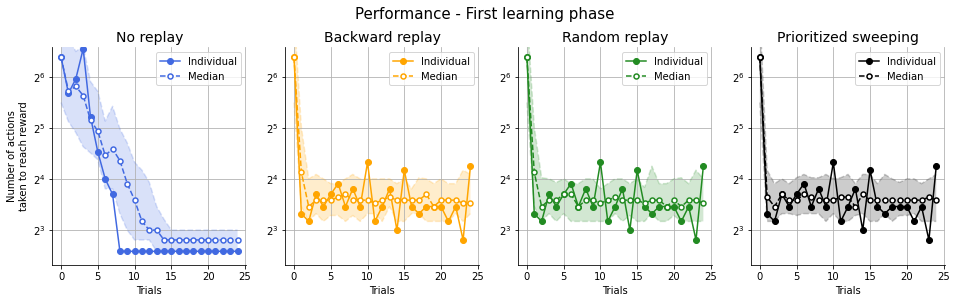

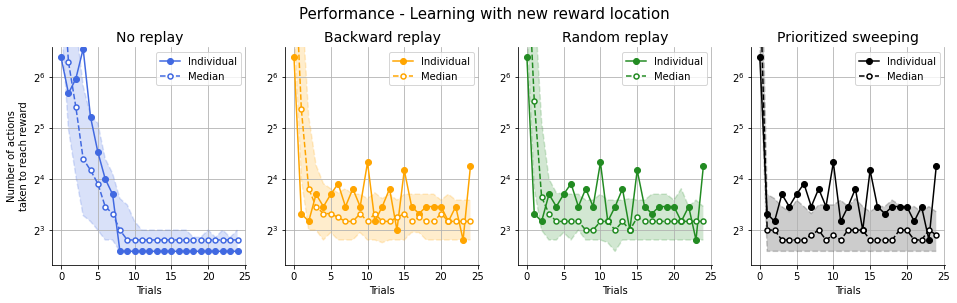

In [22]:
print('Deterministic case')
GRAPH_i.plot_performance_replays(LCl0_indiv_D, LCl0_D, epoch='l0', params=params)
GRAPH_i.plot_performance_replays(LCl1_indiv_D, LCl1_D, epoch='l1', params=params)

Stochastic case


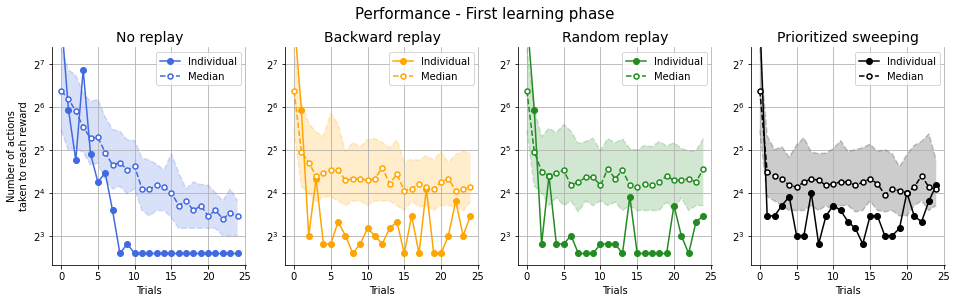

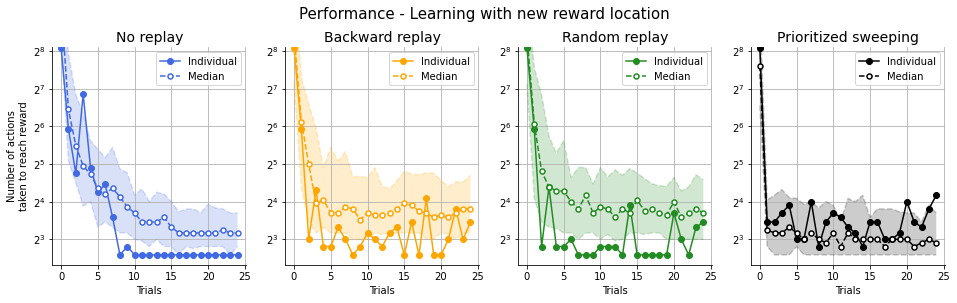

In [23]:
print('Stochastic case')
GRAPH_i.plot_performance_replays(LCl0_indiv_S, LCl0_S, epoch='l0', params=params)
GRAPH_i.plot_performance_replays(LCl1_indiv_S, LCl1_S, epoch='l1', params=params)

## Learning - Phase 0

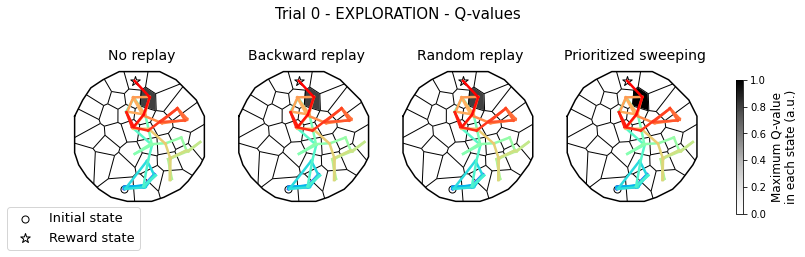

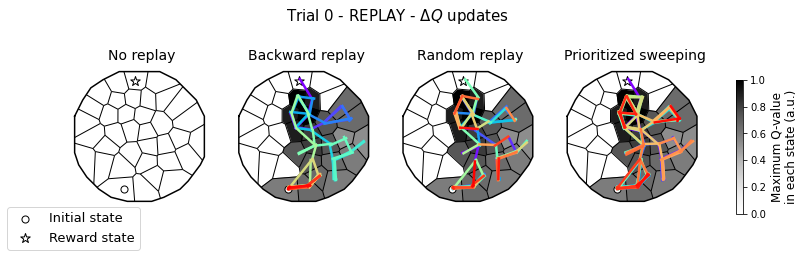

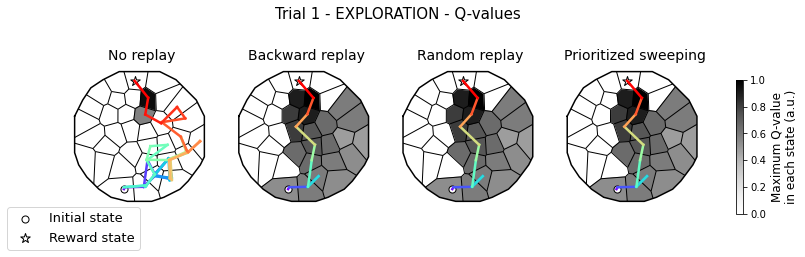

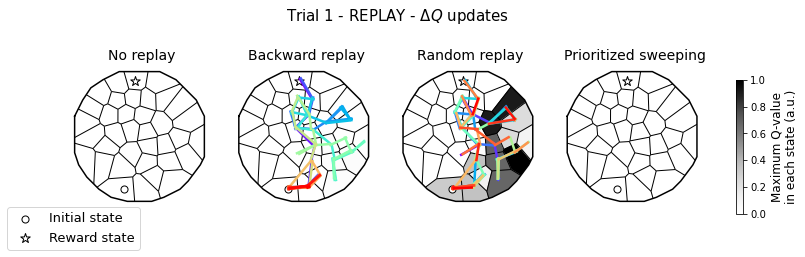

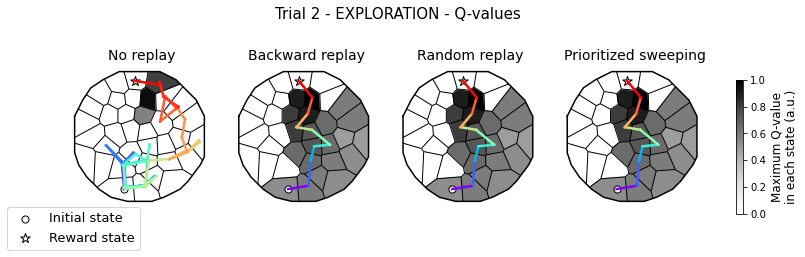

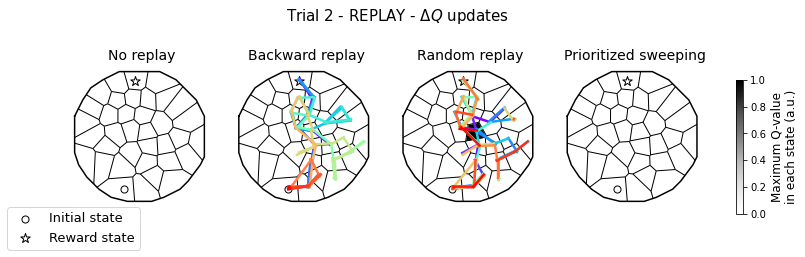

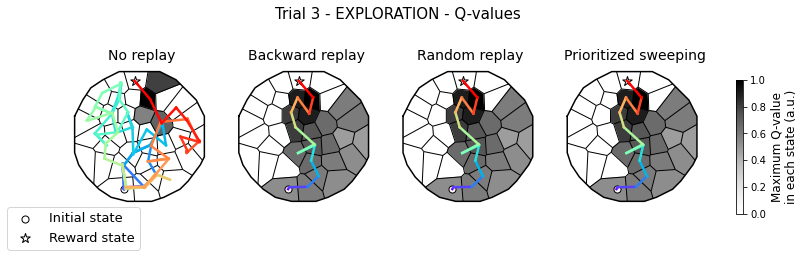

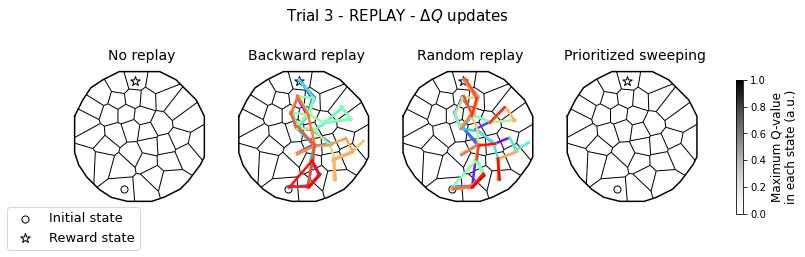

In [37]:
n_trials = 4
for t in range(n_trials):
    Q_rpls = Dl_indiv_D[t]['Q_explo']
    H_rpls = Dl_indiv_D[t]['h_explo']
    GRAPH_Qmap.plot_Qvalues_map(Q_rpls, H_rpls, deterministic=True, fig_title='Trial {} - EXPLORATION - Q-values'.format(t), params=params)
    Q_rpls = Dl_indiv_D[t]['Q_upd']
    H_rpls = Dl_indiv_D[t]['h_repl']
    GRAPH_Qmap.plot_Qvalues_map(Q_rpls, H_rpls, deterministic=True, fig_title=r'Trial {} - REPLAY - $\Delta Q$ updates'.format(t), params=params)

## Learning - Phase 1 (after change of reward state)

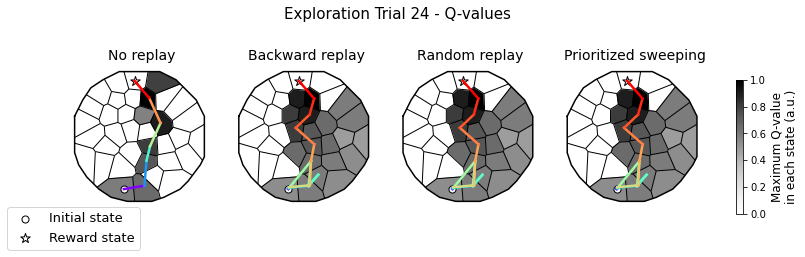

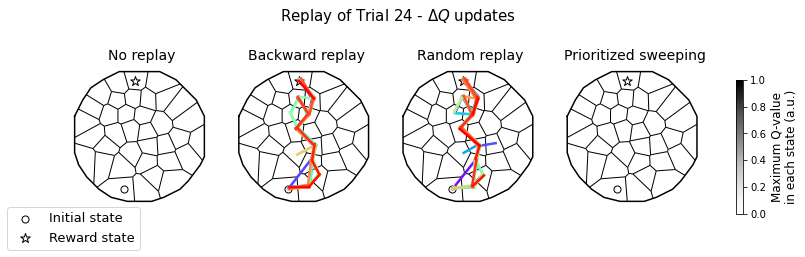

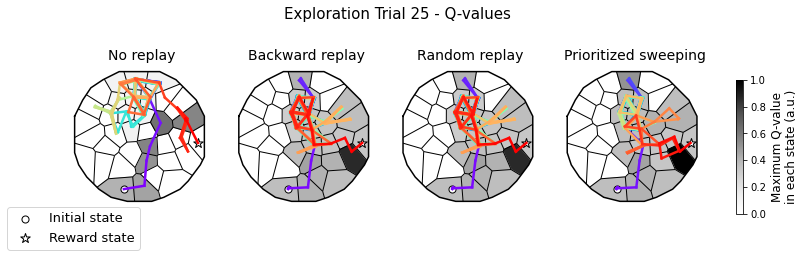

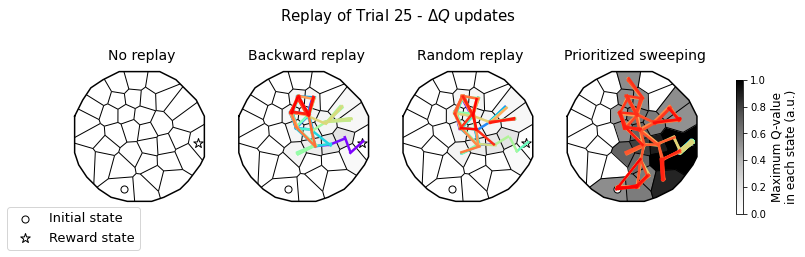

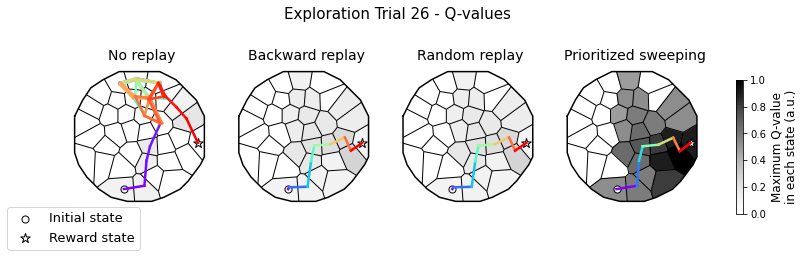

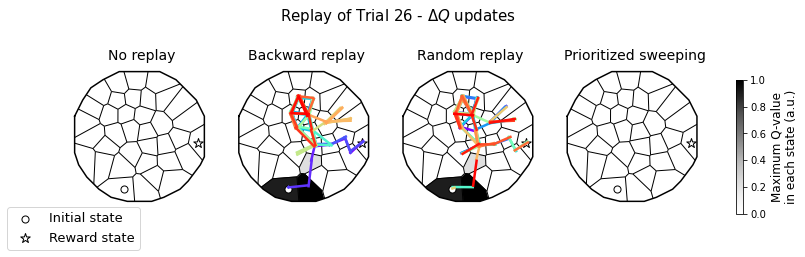

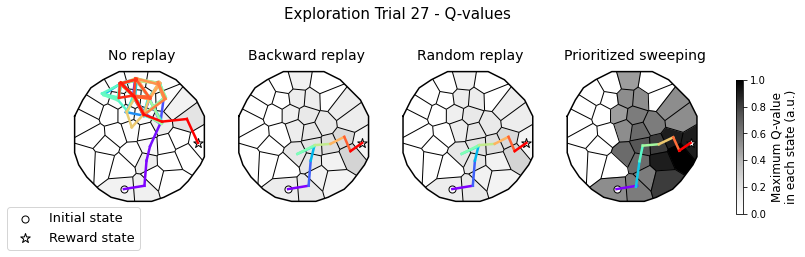

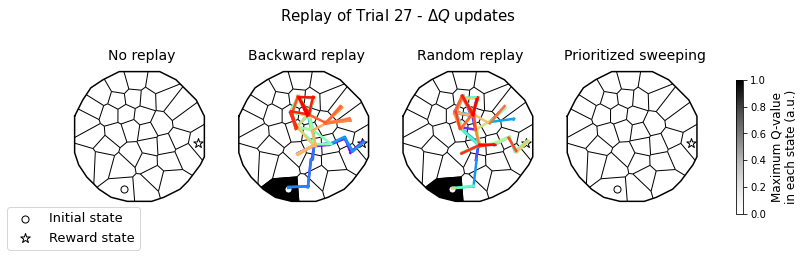

In [38]:
n_trials = 4
for t in range(24, 24+n_trials):
    if t == 24:
        r_state = 0
    else:
        r_state = 1
    Q_rpls = Dl_indiv_D[t]['Q_explo']
    H_rpls = Dl_indiv_D[t]['h_explo']
    GRAPH_Qmap.plot_Qvalues_map(Q_rpls, H_rpls, r_state=r_state, deterministic=True, fig_title='Exploration Trial {} - Q-values'.format(t), params=params)
    Q_rpls = Dl_indiv_D[t]['Q_upd']
    H_rpls = Dl_indiv_D[t]['h_repl']
    GRAPH_Qmap.plot_Qvalues_map(Q_rpls, H_rpls, r_state=r_state, deterministic=True, fig_title=r'Replay of Trial {} - $\Delta Q$ updates'.format(t), params=params)

# Optimization of the learning rate

WARNING : According to the formula, a model-based learning does not depend on $\alpha$.  
$Q(s,a) = R(s,a) + \gamma \sum\limits_{s'}T(s,a,s')\max_{u\in A}Q(s',u)$.  
This is also the case in Mehdi's code.  

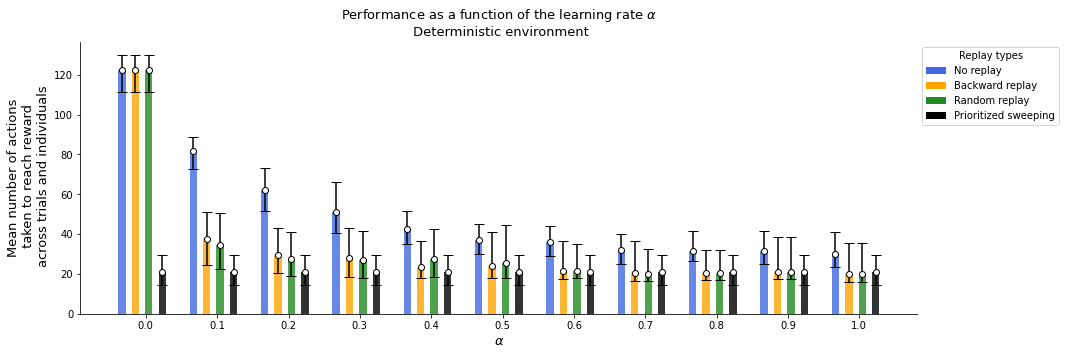

In [30]:
params = copy.deepcopy(PRM.params)
D_alpha_D = SIM.recover_data('D-alpha_D')
D_alpha_S = SIM.recover_data('D-alpha_S')
D_alpha_all = SIM.recover_data('D-alpha_summary')

params = PRM.set_replays(params, replay_refs=[0,1,2,4])
GRAPH_p.compare_alpha_values_replays(D_alpha_D, deterministic=True, params=params)

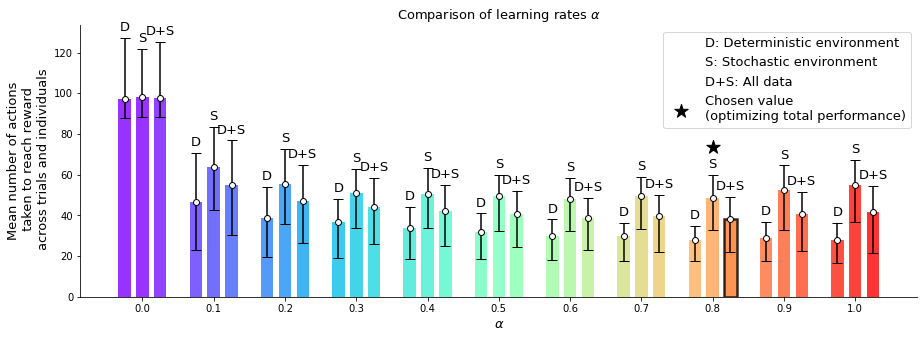

In [31]:
GRAPH_p.compare_alpha_det_stoch_all(D_alpha_all, params=params)

# Test of the number of replays

RR = 1, RSS = 10


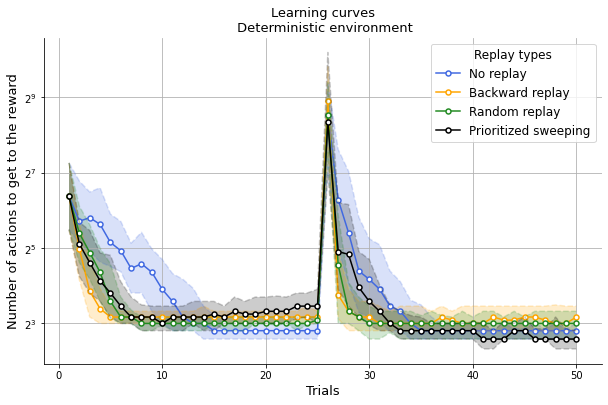

RR = 1, RSS = 50


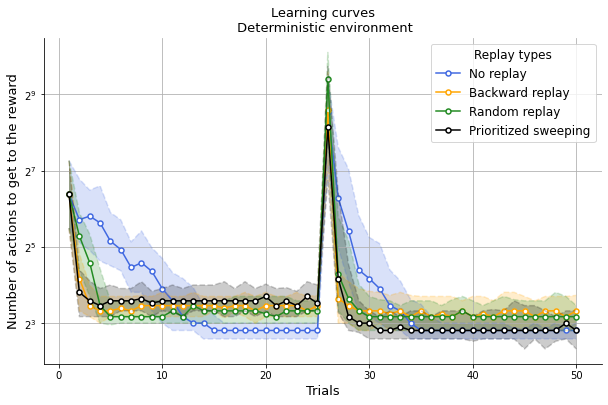

RR = 1, RSS = 90


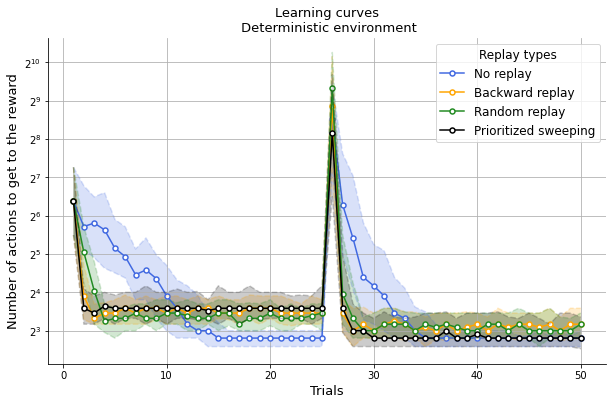

RR = 10, RSS = 10


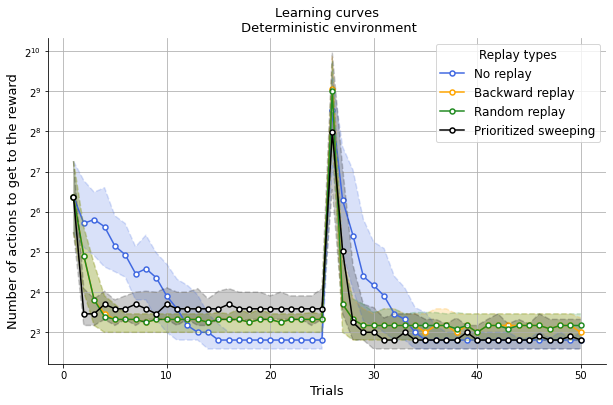

RR = 10, RSS = 50


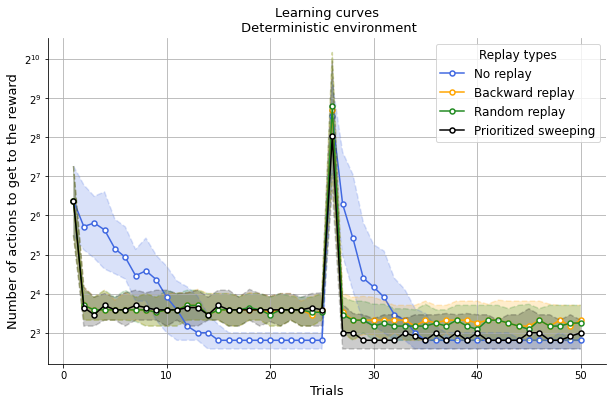

RR = 10, RSS = 90


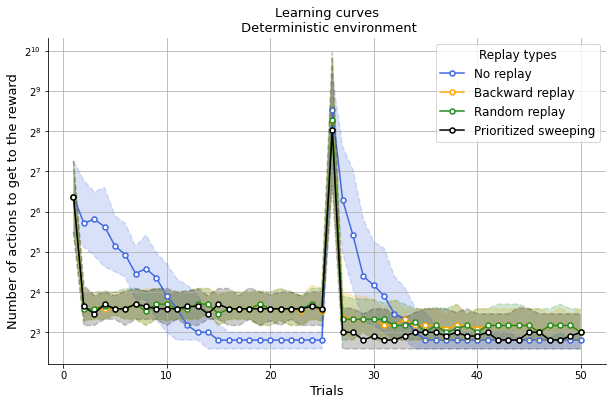

RR = 20, RSS = 10


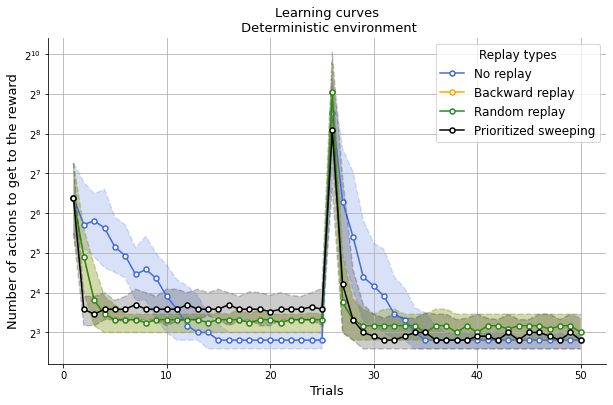

RR = 20, RSS = 50


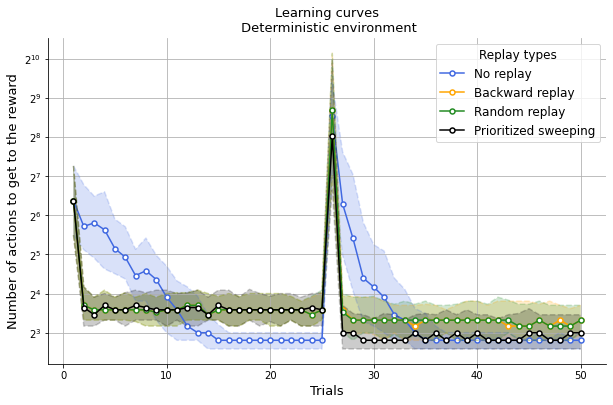

RR = 20, RSS = 90


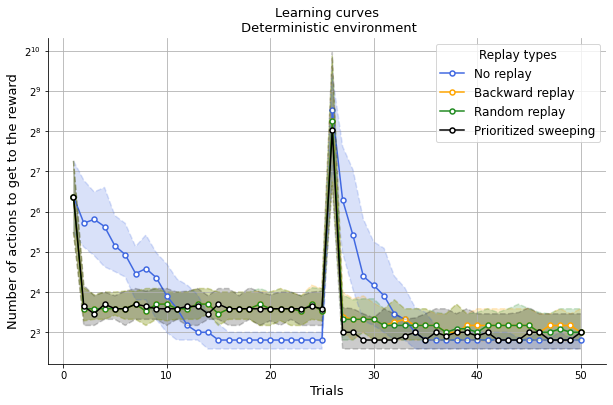

In [42]:
path = '/R_tests/'
env = '_D'
for RR in [1, 10, 20]:
    for RSS in [10, 50, 90]:
        params = copy.deepcopy(PRM.params)
        params['RR'] = RR
        params['RSS'] = RSS
        params['replay_refs'] = [0,1,2,4]
        lab = '_RR{}_RSS{}'.format(RR, RSS)
        Data = SIM.recover_data(path+'Dl'+lab+env)
        Model = SIM.recover_data(path+'Model'+lab+env, df=False)
        LC = SIM.recover_data(path+'LCl'+lab+env)
        print('RR = {}, RSS = {}'.format(RR, RSS))
        GRAPH_p.plot_learning_curves(LC, deterministic=True, save=False, params=params)